In [262]:
import numpy as np
import matplotlib.pyplot as plt

In [421]:
data = np.loadtxt("ex1data1.txt", delimiter=',', dtype={'names': ('population', 'profit'), 'formats': (float, float)})
X1 = data['population']
y = data['profit']
m = len(y)
y = y.reshape(m,1)

In [264]:
m

97

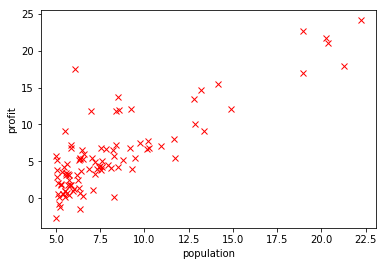

In [422]:
fig = plt.figure()
plt.plot(X1, y, 'rx')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [420]:
X = np.column_stack((np.ones(m), X1))
theta = np.matrix('0;0')

## Compute cost

In [267]:
def computeCost(X, y, theta):
    prediction = X * theta
    m = len(y)
    return np.sum(np.asarray(prediction - y)**2) / (2*len(y))

In [268]:
computeCost(X, y, theta)

32.072733877455676

You should expect to see a cost of **32.07**

## Compute Gradient Descent

In [473]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    theta_history = []
    j_history = []
    for i in range(num_iters):
        prediction = X * theta
        correction = X.T * (prediction - y)
        theta = theta - alpha * (1/m) * correction
        theta_history.append(theta)
        j_history.append(computeCost(X, y, theta))
    return theta, theta_history, j_history

In [429]:
theta, _, _ = gradientDescent(X, y, theta, 0.01, 1500)
theta

matrix([[-3.63029144],
        [ 1.16636235]])

Expected theta values (approx) \begin{equation*}\theta = [-3.6303, 1.1664]\end{equation*}

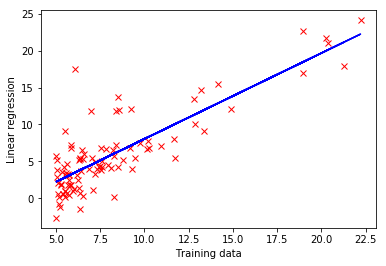

In [355]:
plt.figure()
plt.plot(X1, y, 'rx')
plt.plot(X1, X*theta, 'b-')
plt.xlabel('Training data')
plt.ylabel('Linear regression')
plt.show()

In [365]:
predict1 = [1, 3.5] * theta
predict2 = [1, 7] * theta;
print("For population = 35,000, we predict a profit of {}".format((predict1 * 10000).item(0,0)))
print("For population = 70,000, we predict a profit of {}".format((predict2 * 10000).item(0,0)))

For population = 35,000, we predict a profit of 4519.7678677017675
For population = 70,000, we predict a profit of 45342.45012944714


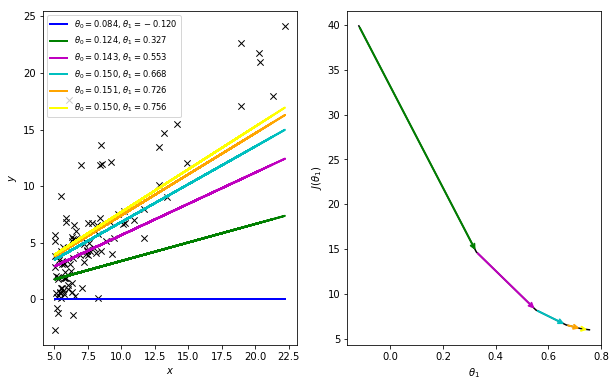

In [513]:
N = 6
_, thetas, costs = gradientDescent(X, y, np.matrix('0;-1'), 0.006, N)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6.15))
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].scatter(X1, y, marker='x', s=40, color='k', lw=1)

ax[1].plot([t.item(1, 0) for t in thetas], costs, 'k')
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')

colors = ['b', 'g', 'm', 'c', 'orange', 'yellow']
ax[0].plot(X1, X * np.matrix('0;0'), color=colors[0], lw=2,
          label=r'$\theta_0 = {:.3f}$, $\theta_1 = {:.3f}$'.format(thetas[0].item(0, 0), thetas[0].item(1, 0)))
for j in range(1, N):
    ax[1].annotate('', xy=(thetas[j][1], costs[j]), xytext=(thetas[j-1][1], costs[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': colors[j], 'lw': 2},
                   va='center', ha='center')
    ax[0].plot(X1, X * thetas[j], color=colors[j], lw=2,
              label=r'$\theta_0 = {:.3f}$, $\theta_1 = {:.3f}$'.format(thetas[j].item(0, 0), thetas[j].item(1, 0)))


ax[0].legend(loc='upper left', fontsize='small')
plt.show()

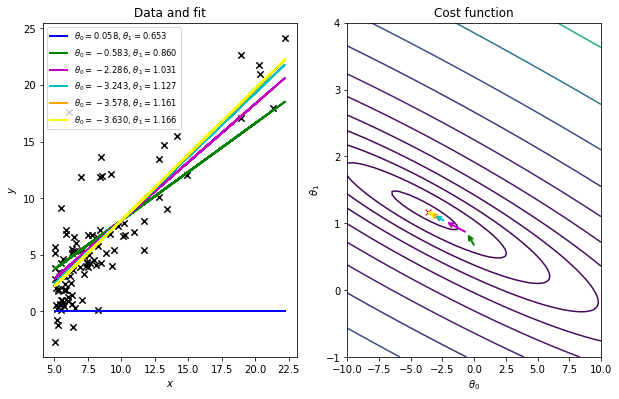

In [518]:
N = 6
final_theta, thetas, costs = gradientDescent(X, y, np.matrix('0;0'), 0.01, 1500)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6.15))
ax[0].scatter(X1, y, marker='x', s=40, color='k')

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.matrix([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = computeCost(X, y, t)
J_vals = J_vals.T

Xmesh, Ymesh = np.meshgrid(theta0_vals, theta1_vals)
contours = ax[1].contour(Xmesh, Ymesh, J_vals, np.logspace(-2, 3, 25))

colors = ['b', 'g', 'm', 'c', 'orange', 'yellow']
ax[0].plot(X1, X * np.matrix('0;0'), color=colors[0], lw=2,
          label=r'$\theta_0 = {:.3f}$, $\theta_1 = {:.3f}$'.format(thetas[0].item(0, 0), thetas[0].item(1, 0)))
indices = [0, 100, 500, 1000, 1400, 1499]
for j in range(1, len(indices)):
    ax[1].annotate('', xy=thetas[indices[j]], xytext=thetas[indices[j-1]],
                   arrowprops={'arrowstyle': '->', 'color': colors[j], 'lw': 2},
                   va='center', ha='center')
    ax[0].plot(X1, X * thetas[indices[j]], color=colors[j], lw=2,
              label=r'$\theta_0 = {:.3f}$, $\theta_1 = {:.3f}$'.format(thetas[indices[j]].item(0, 0), thetas[indices[j]].item(1, 0)))


plt.plot(theta[0], theta[1], 'rx');

ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')

ax[0].legend(loc='upper left', fontsize='small')

plt.show()

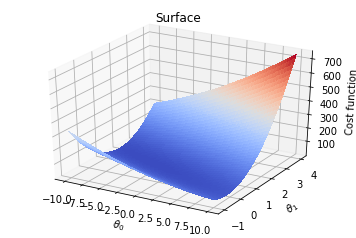

In [526]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = plt.gca(projection='3d')
surf = ax.plot_surface(Xmesh, Ymesh, J_vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost function')
ax.set_title('Surface')

plt.show()

In [717]:
data = np.loadtxt("ex1data2.txt", delimiter=',', dtype={'names': ('size', 'bedrooms', 'price'), 'formats': (float, float, float)})
X = np.array(list(zip(data['size'], data['bedrooms']))).reshape(len(data), 2)
y = data['price']
m = len(y)
y = y.reshape(m,1)
print('First 10 examples from the dataset: \n')
print('\n'.join(['x = [{} {}], y = {}'.format(el[0], el[1], res) for el, res in zip(X[:10], y)]))

First 10 examples from the dataset: 

x = [2104.0 3.0], y = [ 399900.]
x = [1600.0 3.0], y = [ 329900.]
x = [2400.0 3.0], y = [ 369000.]
x = [1416.0 2.0], y = [ 232000.]
x = [3000.0 4.0], y = [ 539900.]
x = [1985.0 4.0], y = [ 299900.]
x = [1534.0 3.0], y = [ 314900.]
x = [1427.0 3.0], y = [ 198999.]
x = [1380.0 3.0], y = [ 212000.]
x = [1494.0 3.0], y = [ 242500.]


In [746]:
def featureNormalize(X):
    X_norm = np.array(X, copy=True)
    mu = np.zeros((1, np.size(X, 1)))
    sigma = np.zeros((1, np.size(X, 1)))
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    for i in range(len(X)):
        X_norm[i] -= mu
        X_norm[i] = np.divide(X_norm[i], sigma)
    return X_norm, mu, sigma

In [754]:
XN, mu, sigma = featureNormalize(X)
XN = np.column_stack((np.ones(m), XN))
print("Mu = {}\nsigma = {}".format(mu, sigma))

Mu = [ 2000.68085106     3.17021277]
sigma = [  7.94702354e+02   7.60981887e-01]


In [700]:
def computeCostMulti(X, y, theta):
    prediction = X * theta
    m = len(y)
    return np.sum(np.asarray(prediction - y)**2) / (2*len(y))

In [750]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    theta_history = []
    j_history = []
    for i in range(num_iters):
        prediction = X * theta
        correction = X.T * (prediction - y)
        theta = theta - alpha / m * correction
        theta_history.append(theta)
        j_history.append(computeCostMulti(X, y, theta))
    return theta, theta_history, j_history

In [757]:
theta, _, J_history = gradientDescentMulti(XN, y, np.matrix('0;0;0'), 0.01, 400)
theta

matrix([[ 334302.06399328],
        [ 100087.11600585],
        [   3673.54845093]])

Alpha = 0.01, the result is 2108850058.4007058
Alpha = 0.02, the result is 2044747669.9229925
Alpha = 0.03, the result is 2043324965.8745556
Alpha = 0.04, the result is 2043281409.4644704
Alpha = 0.05, the result is 2043280091.0882595
Alpha = 0.060000000000000005, the result is 2043280051.7904854
Alpha = 0.06999999999999999, the result is 2043280050.6371288
Alpha = 0.08, the result is 2043280050.6038027
Alpha = 0.09, the result is 2043280050.6028552
Alpha = 0.09999999999999999, the result is 2043280050.602829
Alpha = 0.11, the result is 2043280050.602828
Alpha = 0.12, the result is 2043280050.6028287
Alpha = 0.13, the result is 2043280050.6028283
Alpha = 0.14, the result is 2043280050.602828
Alpha = 0.15000000000000002, the result is 2043280050.602828
Alpha = 0.16, the result is 2043280050.6028273
Alpha = 0.17, the result is 2043280050.6028287
Alpha = 0.18000000000000002, the result is 2043280050.6028283
Alpha = 0.19, the result is 2043280050.602828


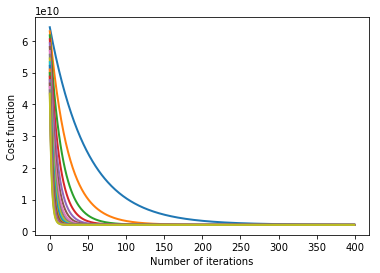

In [816]:
initial_theta = np.matrix('0;0;0')
num_iters = 400
plt.figure()
for alpha in np.arange(0.01, 0.2, 0.01):
    theta, _, J_history = gradientDescentMulti(XN, y, initial_theta, alpha, num_iters)
    plt.plot(range(len(J_history)), J_history, lw=2)
    print("Alpha = {}, the result is {}".format(alpha, computeCostMulti(XN, y, theta)))
    
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.show()

In [826]:
theta, _, _ = gradientDescentMulti(XN, y, np.matrix('0;0;0'), 0.11, 4000)
price = np.insert(np.divide((np.array([1650, 3]) - mu), sigma), 0, 1) * theta
price = price.item(0, 0)
print("Predicted price of a 1650 sq-ft, 3 br house: ${}".format(price))

Predicted price of a 1650 sq-ft, 3 br house: $293081.46433489595


In [857]:
def normalEqn(X, y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)

In [868]:
theta_neqn = normalEqn(np.column_stack((np.ones(m), X)), y)
price_neqn = np.dot(np.array([1, 1650, 3]), theta_neqn)
print("Predicted price of a 1650 sq-ft, 3 br house: ${}".format(price_neqn[0]))

Predicted price of a 1650 sq-ft, 3 br house: $293081.464335059
